In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
data = pd.read_csv('Housing 2.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


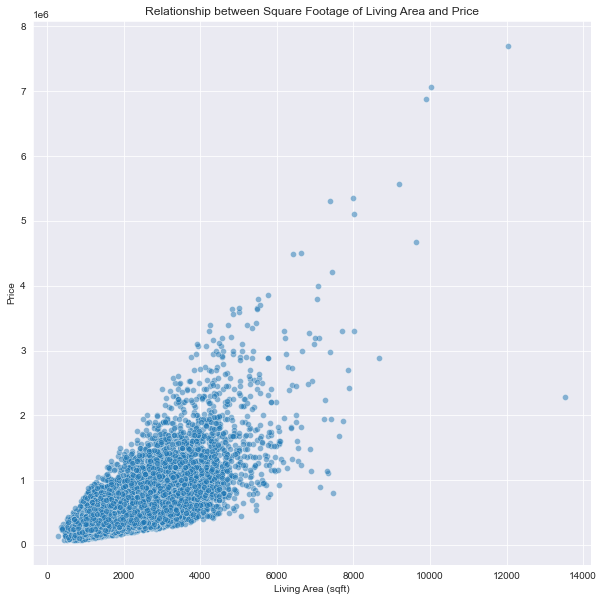

In [36]:
# Set the plotting style
sns.set_style("darkgrid")

# Plot 1: Relationship between sqft_living and price
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.5)
plt.title('Relationship between Square Footage of Living Area and Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()


There is a positive relationship between the square footage of the living area and the house price, meaning larger homes tend to have higher prices. However, some outliers exist, especially for very large homes with unusually high prices.

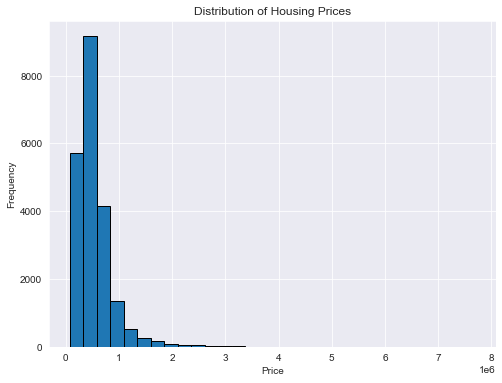

In [54]:
# Plot 2: Distribution of prices
# Validate the 'price' column for any invalid values (e.g., NaNs or infinities)
price_valid = data['price'].replace([np.inf, -np.inf], np.nan).dropna()

# Replot the distribution of prices after validation
plt.figure(figsize=(8, 6))
plt.hist(price_valid, bins=30, edgecolor = 'black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


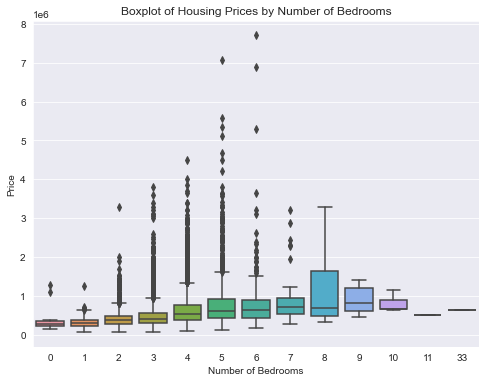

In [38]:
# Plot 3: Boxplot of price by number of bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='bedrooms', y='price')
plt.title('Boxplot of Housing Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


The median house price increases as the number of bedrooms increases up to a certain point. However, houses with more than 8 bedrooms show greater variability, possibly due to different levels of luxury or other unobserved factors.

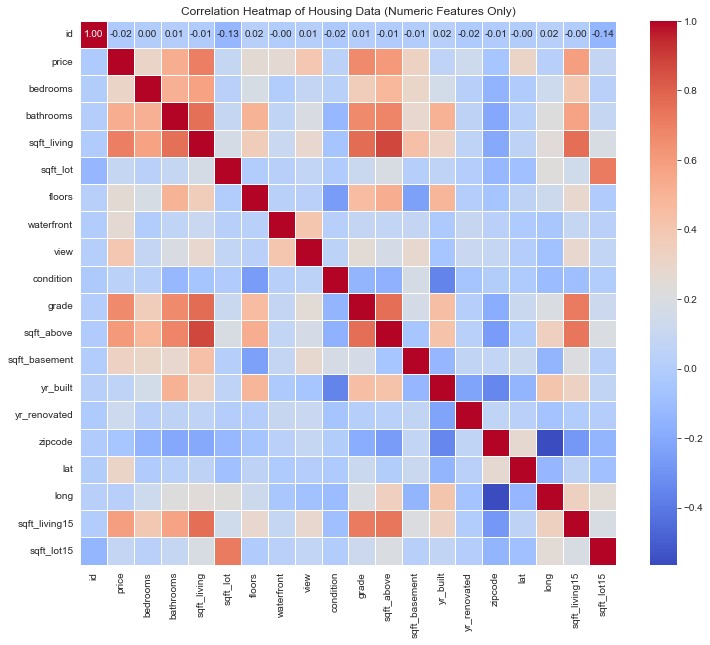

In [39]:
# Plot 4: Correlation heatmap for numeric features
# Generate the correlation heatmap using only numeric columns
numeric_columns = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Housing Data (Numeric Features Only)')
plt.show()


Strong correlations were found between:
- sqft_living and price (0.70): Larger living spaces are associated with higher prices.
- grade and price (0.67): Higher grade homes (better construction and design) are priced higher.
- sqft_above and price (0.61): Above-ground living space also plays a significant role in determining the price.
- Other features like bathrooms, sqft_living15 (average living area of neighboring homes), and waterfront have moderate positive correlations with the price.

In [41]:
# Prepare the dataset by selecting relevant features and the target variable (price)
features = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                         'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                         'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                         'sqft_living15', 'sqft_lot15']]
target = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices for the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


(0.6945681619600914, 209985.36239040067)

- R-squared (R²): 0.695 — This indicates that approximately 69.5% of the variance in house prices is explained by the features used in the model.
- Root Mean Squared Error (RMSE): 209,985 — This shows the average difference between predicted and actual house prices. A lower value indicates better performance.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# Apply log transformation to the target variable to stabilize variance
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Add interaction terms to the features using PolynomialFeatures (degree=2 for pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the transformed data
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_log)

# Predict the log-transformed prices for the test data
y_pred_log = model_poly.predict(X_test_poly)

# Convert the predicted log prices back to their original scale
y_pred = np.exp(y_pred_log)

# Evaluate the new model
r2_poly = r2_score(y_test, y_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))


r2_poly, rmse_poly


/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


(0.6942497593979429, 210094.78526868182)

- R-squared (R²): 0.694 — Similar to the initial model, about 69.4% of the variance in house prices is explained.
- Root Mean Squared Error (RMSE): 210,094 — The RMSE is slightly higher than the previous model's, indicating the modifications did not significantly improve performance.

In [43]:
# Calculate residuals
residuals = y_test - y_pred

/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hekewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


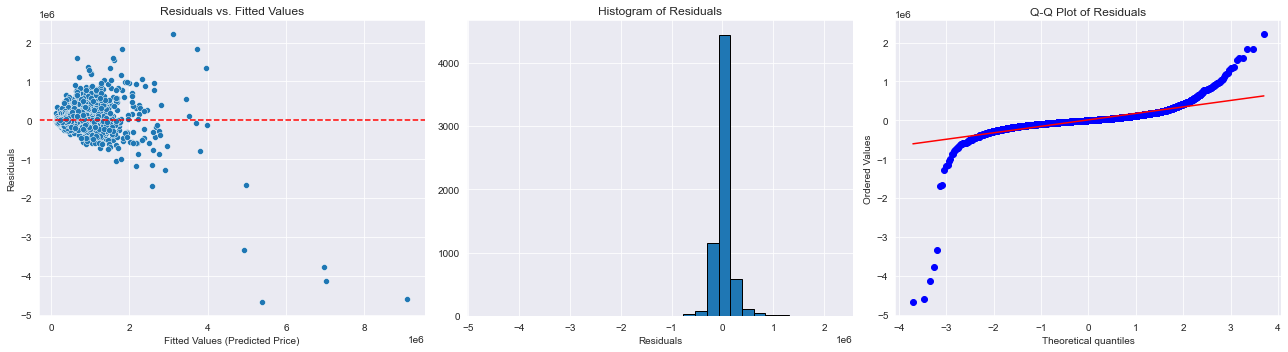

In [56]:
# Plotting residuals to analyze their distribution and patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs. Fitted values
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values (Predicted Price)')
axes[0].set_ylabel('Residuals')

# 2. Histogram of residuals to check normality
axes[1].hist(residuals, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')

# 3. Q-Q plot to analyze normality of residuals
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


### Residuals vs. Fitted Values Plot:

- The plot shows some spread of residuals around the horizontal line at zero.
- Ideally, the residuals should be randomly scattered without any noticeable patterns. Here, there is a slight funneling effect, suggesting potential heteroscedasticity (non-constant variance).

### Histogram of Residuals:

- The distribution appears roughly symmetric but not perfectly normal. There are some outliers on both tails, indicating a few predictions might be off significantly.
- A more normal distribution of residuals would suggest the model fits better.

### Q-Q Plot:

- The Q-Q plot compares the residuals to a normal distribution. Although the points align with the theoretical line in the middle range, there are deviations at the tails, indicating that the residuals are not perfectly normal.
- This suggests the presence of outliers or that the linear model might not capture all the underlying patterns in the data.

In [57]:
# Define a function to identify outliers based on residuals
def remove_outliers(X, y, y_pred, threshold=3):
    residuals = y - y_pred
    std_residuals = np.abs(residuals) / np.std(residuals)  # Standardized residuals
    mask = std_residuals < threshold  # Keep only data points within the threshold
    return X[mask], y[mask]

# Remove outliers from the training data
X_train_clean, y_train_clean_log = remove_outliers(X_train_poly, y_train_log, model_poly.predict(X_train_poly))

# Rebuild the model without outliers
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean_log)

# Predict using the cleaned model on the original test set
y_pred_clean_log = model_clean.predict(X_test_poly)
y_pred_clean = np.exp(y_pred_clean_log)  # Convert back from log scale

# Evaluate the new model
r2_clean = r2_score(y_test, y_pred_clean)
rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))

r2_clean, rmse_clean


(0.6691797715157597, 218538.46982260994)

The linear regression model performs poor may because of non-linear relationship between variables. Let's try xgboost to better capture the non-linear relationship

In [45]:
from xgboost import XGBRegressor

# Set up the XGBoost regressor with default parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train_log)

# Predict using the trained XGBoost model
y_pred_xgb_log = xgb_model.predict(X_test)
y_pred_xgb = np.exp(y_pred_xgb_log)  # Convert predictions back from log scale

# Evaluate the XGBoost model
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

r2_xgb, rmse_xgb


(0.8915112869519193, 125148.06755702314)

- R-squared (R²): 0.892 — This indicates that 89.2% of the variance in house prices is explained by the model, which is a significant improvement over the linear models.
- Root Mean Squared Error (RMSE): 125,148 — The RMSE has decreased considerably, reflecting better predictions compared to the previous models.

### use randomizedsearch CV to randomly selects combinations of hyperparameters from a specified parameter grid. Instead of evaluating all possible combinations, it samples a fixed number of combinations (n_iter), which makes it more efficient.

In [27]:
#
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up and run RandomizedSearchCV
xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train_log)

# Get best model and evaluate it
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Parameters:", random_search.best_params_)
print(f"R-squared: {r2:.4f}, RMSE: {rmse:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
R-squared: 0.8997, RMSE: 120305.31


- R-squared (R²): 0.8997 — This means the model explains nearly 90% of the variance in house prices, indicating excellent performance.
- Root Mean Squared Error (RMSE): 120,305 — A major improvement in predictive accuracy.

In [33]:
from sklearn.model_selection import cross_val_score, KFold

target_log = np.log(target)

# Set up the XGBoost model with the best parameters found
best_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

# Set up k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate MSE
cv_scores = cross_val_score(best_model, features, target_log, cv=kf, 
                            scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -cv_scores  # MSE is returned as negative
rmse_scores = np.sqrt(mse_scores)

# Display results
print("MSE Scores:", mse_scores)
print("RMSE Scores:", rmse_scores)
print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.4f}")

MSE Scores: [0.02729014 0.02756581 0.0275016  0.02725227 0.02766533]
RMSE Scores: [0.16519726 0.16602955 0.16583608 0.16508263 0.16632898]
Mean RMSE: 0.1657
Standard Deviation of RMSE: 0.0005


### RMSE Interpretation:

- The average RMSE of 0.1657 means that, on average, the error in the log-transformed house prices is around 16.6%.
- This is a good result, as the error is small relative to the log-transformed price values.

### Consistency of Performance:

- The standard deviation of 0.0005 shows that the model performs consistently across the 5 folds.
- This suggests that the model generalizes well to unseen data and isn't overfitting or underfitting.


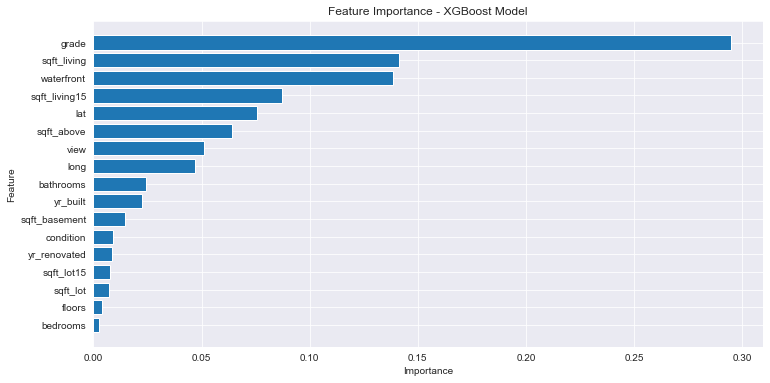

In [30]:
# Train the best XGBoost model using the parameters found earlier
best_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
best_model.fit(features, target)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importance - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## 1. Performance Summary
### Mean RMSE: 0.1657

- This means that the log-transformed house price predictions are, on average, off by 16.6% compared to actual log-transformed prices.
- After taking the exponential of the predicted values, this still suggests that the model can provide reasonably accurate predictions on house prices.
### Low Standard Deviation: 0.0005

- This low variance across the cross-validation folds shows the model generalizes well and provides consistent performance, even when tested on different subsets of the data.

## 2. Feature Importance (Explainability)
By analyzing the feature importance from your XGBoost model, these factors most affect house prices:

- grade: Higher construction or quality grades indicate more expensive houses.
- sqft_living: Larger homes tend to have higher prices.
- waterfront: Waterfront properties are typically more expensive.
- location features (lat, long): Location directly influences house prices.

### Model Insight:
- Non-linear Interactions: XGBoost captures complex interactions between these features. For example:
- A house with a large living area and a high grade may cost more non-linearly than predicted by either feature alone.
- Homes with high construction quality in prime locations (latitude and longitude) may fetch premium prices.

## 3. Strengths of the Model
- Handles Non-linearity: XGBoost captures non-linear relationships between features, making it ideal for complex datasets like house prices.
- Feature Interactions: The model accounts for interactions between features that impact prices (e.g., location and size).
- Resistant to Outliers: XGBoost tends to perform well even with some outliers in the data, unlike linear models.